<a href="https://colab.research.google.com/github/Jenn-mawia/Titanic-data-classification-and-spam-messages-classification/blob/main/KNN_Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Passengers' Survival Using the Titanic Data**

# Defining the question

>**Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck**


# Specifying the question

- Build a model that makes the above prediction **using K-Nearest Neighbors Classifier**
- Optimize the model, making sure to document how you've set up your hyperparameters. This includes feature selection, splitting the data into subsets to use in modeling. 


# Defining the metrics for success

>This project will be considered a success if:
- a KNN model is built to predict the survival rate of passengers that were on board on the Titanic ship.
- the model is optimized to its best performance and fits the criteria of few misclassification errors while overcoming overfitting and underfitting problems.




# Understanding the context

>On April 15, 1912, the Belfast built RMS Titanic sank after colliding with an iceberg, killing over 1,500 passengers and crew on board out of the estimated 2227 people on board. Although Titanic had advanced safety features, such as watertight compartments and remotely activated watertight doors, it only carried enough lifeboats for 1,178 people—about half the number on board. 

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. For instance, A disproportionate number of men were left aboard because of a "*women and children first*" protocol for loading lifeboats. The first-class accommodation was designed to be the pinnacle of comfort and luxury, with a gymnasium, swimming pool, libraries, high-class restaurants, and opulent cabins. 

It is for this reason that this project seeks to find “what sorts of people were more likely to survive?” using passenger data (i.e. in terms of age, gender, socio-economic class, etc)

# Experimental Design

The following is the order in which I went about this project:

- Data sourcing & understanding
- Checking the data (shape, number of records, datatypes)
- Data cleaning procedures (handling null values,outliers, anomalies)
- Exploratory data analysis (Univariate, Bivariate, Multivariate analyses)
- Implementing the solution
  - KNN Classification
    - Model Optimization and Improvement
    - Remodeling using tuned parameters
- Challenging the solution
-Follow up questions

# **Importing Libraries**

In [ ]:
# data manipulation/processing
import pandas as pd
# linear algebra
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing/scaling
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.model_selection import train_test_split

# model performance metrics 
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Reading the data

>There are two datasets for this project. One named train and the other test. The train dataset will be used to build the model while the train dataset will be used to test how the model performs on unseen data. 

In [ ]:
# reading the train data 
train_data = pd.read_csv("train (5).csv")

# reading the test data
test_data = pd.read_csv("test (1).csv")

# Checking the data

In [ ]:
# number of rows and columns in the data
print("Train data: ", train_data.shape)

print("Test data: ", test_data.shape)

Train data:  (891, 12)
Test data:  (418, 11)


In [ ]:
# check the top of the dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# check the bottom of the dataset
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# check the datatypes of the columns
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

>The train and test datasets have similar data that include passenger information like name, age, gender, socio-economic class, etc. The train data has 891 rows and 12 columns and reveals whether a passenger survived or not. The test data with 418 rows and 11 columns contains similar information but does not disclose whether the passenger survived or not, and these are the predictions that need to be made. 

# Appropriateness of the available data to answer the given question

The data available is a csv file which can be downloaded on this [train data](https://archive.org/download/train5_202002/train%20%285%29.csv), [test data](https://archive.org/download/test1_202002/test%20%281%29.csv).

The data contains features such as a passenger's name, their sex, age, number of siblings on board(Sibsp), amount of fare paid, passenger class, cabin etc. 

These features all had a huge effect when the ship sank and will be useful to us in classifying a passenger's survival. 

We can therefore conclude that the data available is appropriate and relevant to the needs of the research question.


# **Data Cleaning**

>We will perform similar transformations on both the train and test data to avoid any inconsistencies during the modeling process. 

## Missing data

>Missing data has been coded with Nan values and need to be handled(imputing/dropping). 

In [ ]:
# check for missing data in the train data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print(test_data.shape)
test_data.isnull().sum()

(418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

>The cabin column contains missing values for almost all entries. We can drop this column. 

We can impute the missing values in the Age column, but first it is important to know the distribution of the ages. It is also likely that a passenger's age determined the class they could pay for i.e. older passengers are likely to pay for first class due to their economic status.

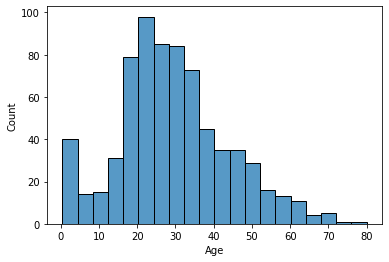

In [ ]:
train = train_data.drop('Cabin', 1)
test = test_data.drop('Cabin', 1)
# check the distribution of the Age column 
sns.histplot(train['Age'])

# the ages of the passengers and crew on board assumes the shape of a normal curve and can be said to be normally distrbuted

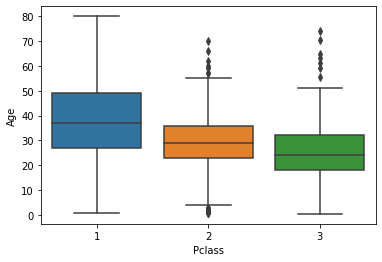

In [ ]:
# check the distribution of ages against the passengers' class on the ship
sns.boxplot(train['Pclass'], train['Age'])

From the above plots, we can see that:
- the ages of the passengers and crew on board assumes the shape of a normal curve and can be said to be normally distrbuted. 
- age and passenger's class are related. Most passengers in first class were of age between 29 and 48, 2nd class- between 22 and 36, 3rd class- between ages 20 and 30. 

We can therefore use this criteria to fill the missing values in the Age column.



In [ ]:
# find the mean ages of passengers in each class
first_class = train[(train['Pclass']==1)]
print("The mean age of passengers in 1st class: ",round(first_class['Age'].mean()))

second_class = train[(train['Pclass']==2)]
print("The mean age of passengers in 2nd class: ", round(second_class['Age'].mean()))

third_class = train[(train['Pclass']==3)]
print("The mean age of passengers in 3rd class: ", round(third_class['Age'].mean()))



The mean age of passengers in 1st class:  38
The mean age of passengers in 2nd class:  30
The mean age of passengers in 3rd class:  25


In [ ]:
# find the mean ages of passengers in each class in the test dataset
first_class_test = test[(test['Pclass']==1)]
print("The mean age of passengers in 1st class_testdata: ",round(first_class_test['Age'].mean()))

second_class_test = test[(test['Pclass']==2)]
print("The mean age of passengers in 2nd class_testdata: ", round(second_class_test['Age'].mean()))

third_class_test = test[(test['Pclass']==3)]
print("The mean age of passengers in 3rd class_testdata: ", round(third_class_test['Age'].mean()))



The mean age of passengers in 1st class_testdata:  41
The mean age of passengers in 2nd class_testdata:  29
The mean age of passengers in 3rd class_testdata:  24


In [ ]:
# we will use these mean ages to fill in the null values in the train data

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    # find each null value in the Age column, checks the Pclass and imputes the age according to the above mean age in that class
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

# we will use the mean ages per class to fill in the null values in the test data

def age_approx_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
# apply the function and check for null values, we see that there are no more null values in the age variable.
#
train['Age'] = train[['Age', 'Pclass']].apply(age_approx, axis=1)
print(train.isnull().sum())

test['Age'] = test[['Age', 'Pclass']].apply(age_approx_test, axis=1)
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [ ]:
# there are only few missing values remaining in the "Embarked" and "Fare" column, these can be dropped without causing much harm
train = train.dropna()
print(train.isnull().sum())

test = test.dropna()
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Data-Type Conversion

>Some columns contain categorical data which is of object type and needs to be transformed to numeric datatype to make it easier for plotting and also during modelling. 

In [ ]:
# drop unnecessary columns. These columns will not be useful during modeling.
train = train.drop(['PassengerId', 'Name', 'Ticket'], 1)
test = test.drop(['PassengerId', 'Name', 'Ticket'], 1)

In [ ]:
print(train.head())

print(test.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


In [ ]:
# check for categorical columns in the data and print them out

# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
categorical_feature_mask_test = test.dtypes==object


# filter categorical columns using mask and turn it into a list
categorical_cols = train.columns[categorical_feature_mask].tolist()
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

print(categorical_cols)
print(categorical_cols_test)

# categorical columns in both the test and train data are the sex and embarked columns

['Sex', 'Embarked']
['Sex', 'Embarked']


In [ ]:

# Using a for loop to change columns to their appropriate datatypes
#
for column in train.columns:
    if column in categorical_cols:
      train[column] = train[column].astype('category').cat.codes

# perform the same transformation on the test data

for column in test.columns:
    if column in categorical_cols_test:
      test[column] = test[column].astype('category').cat.codes
  
# Previewing the column datatypes to check whether the changes have been effected
#
print(train.dtypes)
print(test.dtypes)

Survived      int64
Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked       int8
dtype: object
Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked       int8
dtype: object


>The data is now numerical which we can work with easily.

## Outliers

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

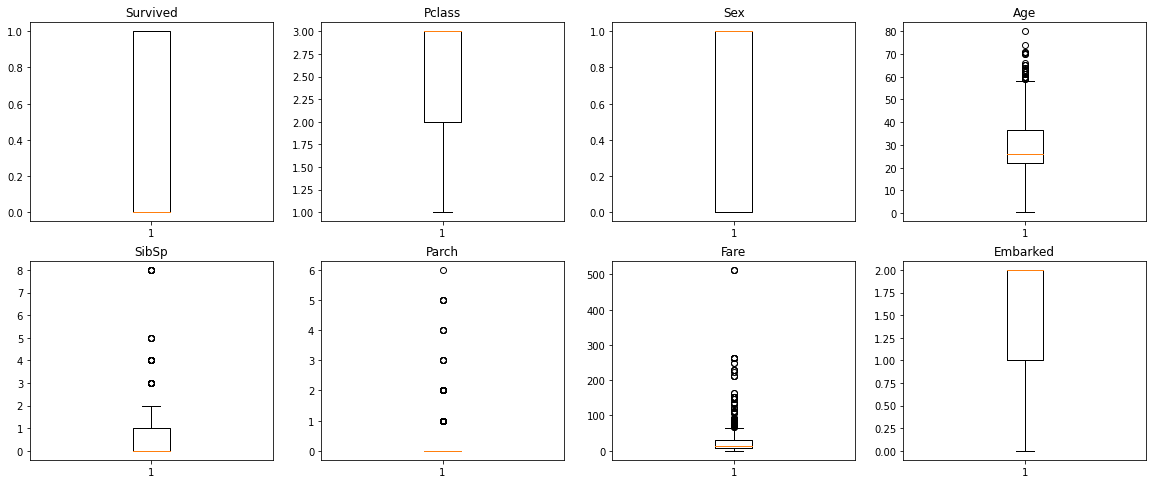

In [ ]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'Survived':1, 'Pclass':2,'Sex':3, 'Age':4, 'SibSp':5, 'Parch':6, 'Fare':7, 'Embarked':8}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(7,4,i)
  plt.boxplot(train[variable])
  plt.title(variable)

plt.show()

In [ ]:
# dealing with outliers

print(f"Size of dataset with outliers: {train.shape}")
# dealing with outliers
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
data = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

print("...................")

print(f"Size of dataset after removal of outliers: {data.shape}")

Size of dataset with outliers: (889, 8)
...................
Size of dataset after removal of outliers: (587, 8)


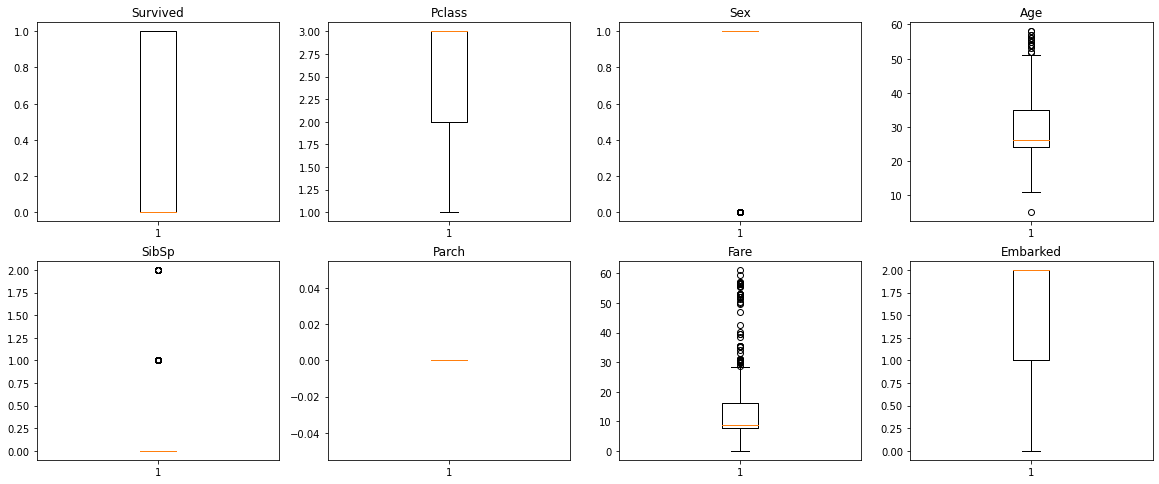

In [ ]:
plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(7,4,i)
  plt.boxplot(data[variable])
  plt.title(variable)

plt.show()

>removing outliers causes inconsistencies in our data especially in columns that contain categorical data such as Sex, Sibsp, Parch. For columns with continuous data such as Age and Fare, not all of them are removed. We will therefore revert back to our initial state to avoid loosing important information. 

In [ ]:
train.shape

(889, 8)

## Anomalies

In [ ]:
# checking for anomalies
# calculate the interquartile range using pandas
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1

# the interquartile range can also be calculated using numpy
iqr1 = np.quantile(train['Fare'], .25)
iqr3 = np.quantile(train['Fare'], .75)
IQR2 = iqr3 - iqr1

# compare the two values
print(IQR, IQR2)

23.1042 23.1042


# Exploratory Data Analysis

## Univariate Analysis

**Histogram plots**

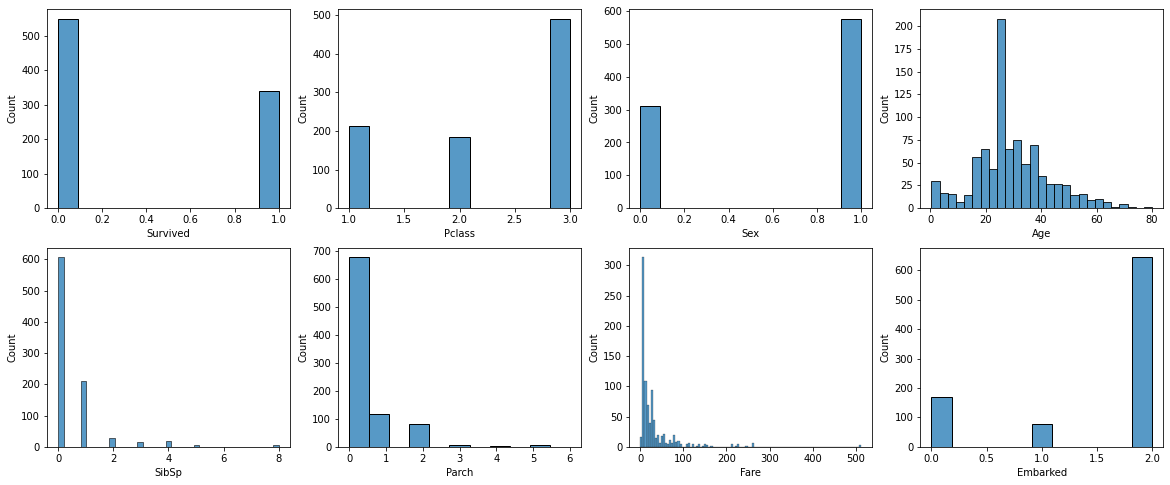

In [ ]:
# plot histograms for all numeric columns
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  plt.subplot(7,4,i)
  sns.histplot(train[variable])

plt.show()

>The Age data assumes the shape of a normal curve, while the Fare data is skewed to the right. The rest of the data is categorical in nature and can be seen in the bar plots.

**Measures of central tendency**

In [ ]:
# compute the mean of the columns in the data
train.mean()


Survived     0.382452
Pclass       2.311586
Sex          0.649044
Age         29.218414
SibSp        0.524184
Parch        0.382452
Fare        32.096681
Embarked     1.535433
dtype: float64

In [ ]:
# compute the mean of the columns in the data
train.median()


Survived     0.0000
Pclass       3.0000
Sex          1.0000
Age         26.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
Embarked     2.0000
dtype: float64

In [ ]:
# compute the mean of the columns in the data
train.mode()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,25.0,0,0,8.05,2


>- the mean age of passengers on board was 29years
- the median age of passengers on board was 26years
- the median of the fare paid was 14.4542
- most of the passengers on board were 25years
- the modal fare paid was 8.05
- most of the passengers took 3rd class and did not have any siblings aboard
- most of the passengers were male and did not survive the shipwreck. 

We have visualized this statistics before, where we saw that passengers that were younger were more likely to take 3rd class on the ship and hence paying less fare.

This information also is true from the history. Most males did not survive the wreck due to the "women and children first" protocol for loading lifeboats. 

**Measures of dispersion**

In [ ]:
# # find the standard deviations, quantiles, min and max values

# summary statistics of the data
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.218414,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,13.178017,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,36.500000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [ ]:
# compute the variance for each variable
var = train.var()
var1 = pd.DataFrame()
var1['variance'] = var
var1.sort_values(by='variance', ascending=False)
# columns with higher variances are the non-categorical columns while categorical columns have lower variances

,variance
Fare,2469.841935
Age,173.660141
SibSp,1.218164
Pclass,0.696724
Parch,0.650863
Embarked,0.627403
Survived,0.236448
Sex,0.228042


In [ ]:
# compute the skewness for each variable
train.skew()

# Pclass, Sex and point of embarkation are negatively skewed while the other fields are positively skewed.

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.512581
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked   -1.261367
dtype: float64

## Bivariate Analysis

**Pairplot of continuous variables**

Text(0.5, 1.0, 'Pairplot of Age and Fare')

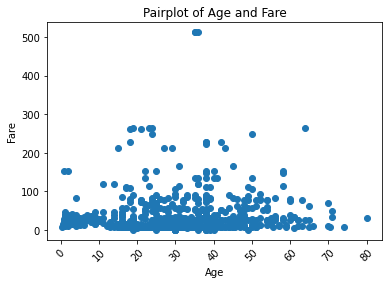

In [ ]:
# pairplot of age and fare columns
plt.scatter(train['Age'], train['Fare'])

plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Pairplot of Age and Fare")

Text(0.5, 1.0, 'Age distribution of passengers at the emabarkation points')

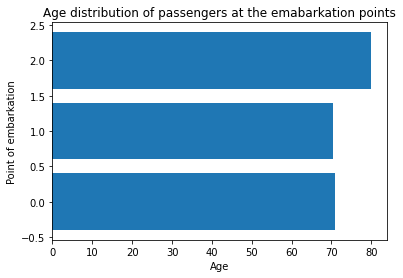

In [ ]:
# age distribution at the point of embarkation for the passengers
plt.barh(train['Embarked'], train['Age'])
plt.xlabel("Age")
plt.ylabel('Point of embarkation')
plt.title('Age distribution of passengers at the emabarkation points')
# most passengers embarked at point S

Text(0.5, 1.0, 'Fare charges at the embarkation points')

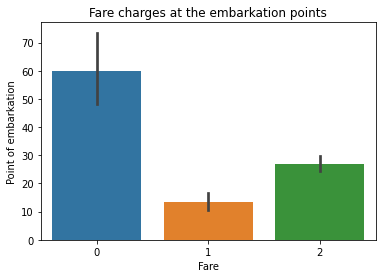

In [ ]:
# fare paid for the embarkation points
sns.barplot(train['Embarked'], train['Fare'])
plt.xlabel("Fare")
plt.ylabel('Point of embarkation')
plt.title('Fare charges at the embarkation points')

# at point Q, passengers paid more fare compared to points C and S

Text(0.5, 1.0, 'Fare charges per Class')

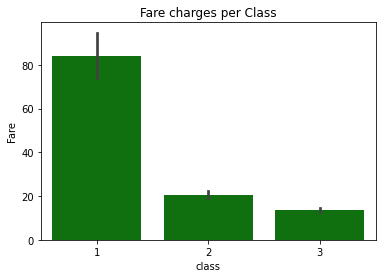

In [ ]:
# fare paid per class
sns.barplot(train['Pclass'], train['Fare'], color='green')
plt.ylabel("Fare")
plt.xlabel('class')
plt.title('Fare charges per Class')

# passengers that took 1st Class paid more fare due to the services and luxury it came with

>- most passengers embarked at Southampton port followed by Cherbourg port and Queenstown port
- passengers that took 1st Class paid more fare due to the services and luxury it came with than those in 2nd and 3rd class. Logically, it looks like the classification of "Pclass" is defined by the value of the passenger's fare.


**Correlation matrix**

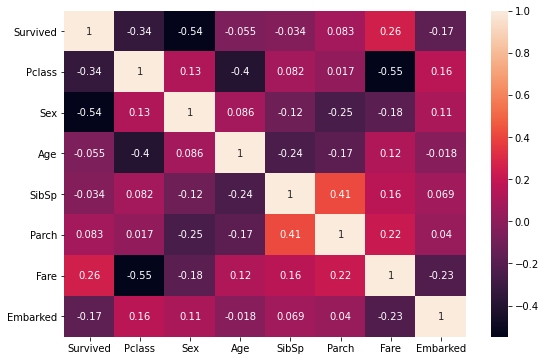

In [ ]:
# plot correlations of the variables 
plt.figure(figsize = (9,6))
sns.heatmap(train.corr(), annot=True)

>- There is a high negative correlation between survival rate of a passenger and their Sex(most males did not survive). There is also a slight correlation between survival and PClass a passenger was in and the amount of fare they paid. 
- There is a slight correlation between the PClass and Age, and a high correlation between PClass and Fare
- There is a positive correlation between the number of siblings/spouses(SibSp) and Parch(number of parents/children) on board.

## Multivariate Analysis

**Factor Analysis**

>Since we are predicting survival rate of passengers and crew on board, it is important to find out which variables played/ had a huge influence to survival of a passenger. We will investigate this using Factor Analysis method. 

In [ ]:
# remove the Survival variable from the data
df = train.drop('Survived', 1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [ ]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
#The p value is 0 the observed matrix is not an identity matrix, hence we can continue to perform factor analysis on the data

(950.8152356162532, 4.072458101704506e-188)

In [ ]:
# Creating factor analysis object and perform factor analysis 
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(df,7, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
# Here, we can see only for 3 eigenvalues(factors) are greater than one. 
# It means we need to choose only 3 factors (or unobserved variables).

,Original_Eigenvalues
0,1.873908
1,1.740173
2,1.007596
3,0.840526
4,0.628220
5,0.554941
6,0.354636


In [ ]:

fa = FactorAnalyzer()
fa.analyze(df, 3, rotation="varimax")

# check the factor loadings
fa.loadings

# Factor 1 has high factor loadings for PClass, Fare(socio-economic status)
# Factor 2 has high factor loadings for SibSp, Parch(family members on board)
# Factor 3 has high factor loadings for Embarked(point of embarkation)

,Factor1,Factor2,Factor3
Pclass,0.972271,-0.018671,0.103797
Sex,0.095681,-0.313602,0.137100
Age,-0.424427,-0.298139,0.033485
SibSp,0.095063,0.595181,0.068996
Parch,0.012144,0.686528,0.037537
Fare,-0.532093,0.350843,-0.228603
Embarked,0.088334,0.013026,0.789148


In [ ]:
# Getting variance of each factors

fa.get_factor_variance()

# Noting total 46.9% cumulative Variance explained by the 3 factors.
# We conclude that the we have found 3 factors that contributed highly to the survival rate of a passenger on board

,Factor1,Factor2,Factor3
SS Loadings,1.434714,1.136403,0.711875
Proportion Var,0.204959,0.162343,0.101696
Cumulative Var,0.204959,0.367302,0.468999


>From the factor analysis, we have come up with 3 factors that contributed largely to the survival of a passenger:
- **socio-economic status** of the passenger, defined by the amount of fare paid and the class that a passenger took
-  **number of family members on board**. From previous statistics, it is noted that passengers who had other family members on board(siblings, spouse, parent, child) had a low survival rate than those who did not.
- The **point which a passenger embarked** from also determined their survival rate. Historical statistics show that the highest rate of survival was from Cherbourg where over half of the passengers departing from this region survived the accident. Those whom called Queenstown their port of call had the second-highest survival rate while Southampton, U.K. came in last with a survival rate of only ⅓.
 

# Implementing the solution

# Modelling

## KNN Classification

In [ ]:
# Implementing the Solution

# selecting features and labels
X = train.drop('Survived', 1).values #features
y = train['Survived'].values #labels

# feature scaling
X = StandardScaler().fit_transform(X)

# splitting the train data further into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [ ]:
# modeling
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

# fitting the train sets onto the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# predicting using our built model
y_pred = classifier.predict(X_test)

# model performance and evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7134831460674157
[[85 20]
 [31 42]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       105
           1       0.68      0.58      0.62        73

    accuracy                           0.71       178
   macro avg       0.71      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



>The model has an accuracy of 71%, and with a few misclassification errors in the confusion matrix. 

We can try to improve our model by tuning our parameters to see the effect they have. 

## Model Optimization and Improvement

**Improving the k-value**

>find the optimal value of of K for the n_neighbors parameter. Using a for loop, I will fit train sets onto the KNN Classifier and predict using k values for range 1-20 and make predictions each time to find the minimum error using the predictions made, and make a plot of this error rate

Minimum error:- 0.24719101123595505 at K = 15


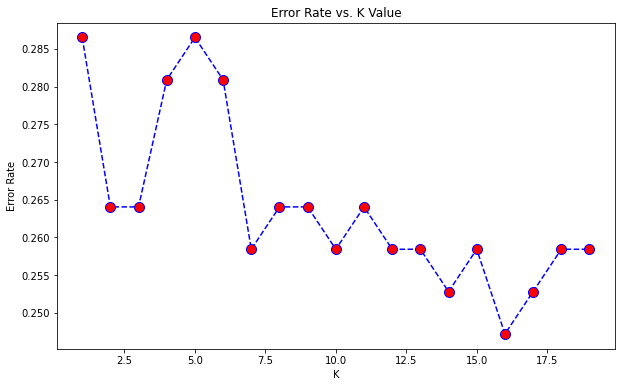

In [ ]:
# initialize an empty list that will contain error rate
error_rate = []

# for loop
for i in range(1,20):
  # define the model
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train) #fit training data onto model
 pred_i = knn.predict(X_test) #make predictions
 error_rate.append(np.mean(pred_i != y_test)) #get the error rate for each value and append this value onto the empty list

# make a line plot of the error rate at each k-value
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
# labeling the plot
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# display the minimum error recorded and the value of k
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

>Minimum error rate is achieved at k=15. We can also find out at what k value does our model achieve the maximum accuracy. 

Maximum accuracy:- 0.7528089887640449 at K = 15


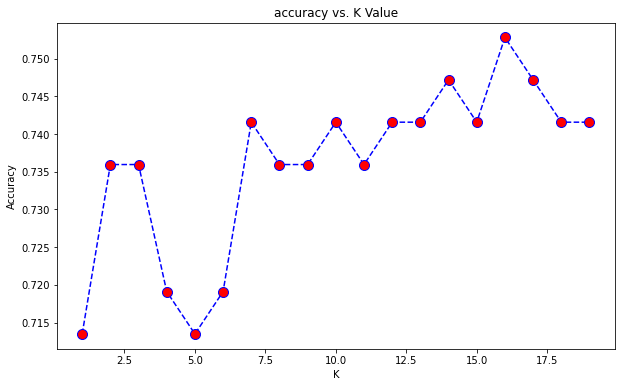

In [ ]:
# initialize an empty list that will contain the accuracies
acc = []

# for loop to find the best accuracy score
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train) #modeling and fitting training data onto the model 
    yhat = neigh.predict(X_test) #making predictions using the model we have created
    acc.append(metrics.accuracy_score(y_test, yhat)) #performance metrics 
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

>From the above plots, highest accuracy and minimum error is achieved when k=15. This is the value we will use to improve our model. 

**Scaling our features**

The first model built had features scaled with Standard Scaler achieving an accuracy of 71%. We can try to scale features using the MinMaxScaler and the RobustScaler to see the changes in the model accuracy that occur. 

In [ ]:
# Implementing the Solution

# selecting features and labels
X = train.drop('Survived', 1).values #features
y = train['Survived'].values #labels

# feature scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler
X = MinMaxScaler().fit_transform(X)

# splitting the train data further into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# modeling
classifier = KNeighborsClassifier(n_neighbors=5)

# fitting the train sets onto the model
classifier.fit(X_train, y_train)

# predicting using our built model
y_pred = classifier.predict(X_test)

# model performance and evaluation

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7191011235955056
[[84 21]
 [29 44]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.68      0.60      0.64        73

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



In [ ]:
# Implementing the Solution

# selecting features and labels
X = train.drop('Survived', 1).values #features
y = train['Survived'].values #labels

# feature scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler
X = RobustScaler().fit_transform(X)

# splitting the train data further into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# modeling
classifier = KNeighborsClassifier(n_neighbors=5)

# fitting the train sets onto the model
classifier.fit(X_train, y_train)

# predicting using our built model
y_pred = classifier.predict(X_test)

# model performance and evaluation

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.702247191011236
[[80 25]
 [28 45]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       105
           1       0.64      0.62      0.63        73

    accuracy                           0.70       178
   macro avg       0.69      0.69      0.69       178
weighted avg       0.70      0.70      0.70       178



>the model's accuracy improves by 1% using the MinMaxScaler with k=5 while the model's accuracy drops by 1% using the RobustScaler with k =5. 
We will therefore use the MinMaxScaler to scale our features since we achieve better accuracy using it. 

**Weights**

In [ ]:
# Implementing the Solution

# selecting features and labels
X = train.drop('Survived', 1).values #features
y = train['Survived'].values #labels

# feature scaling
X = MinMaxScaler().fit_transform(X)

# splitting the train data further into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# modeling
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')

# fitting the train sets onto the model
classifier.fit(X_train, y_train)

# predicting using our built model
y_pred = classifier.predict(X_test)

# model performance and evaluation

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7247191011235955
[[84 21]
 [28 45]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       105
           1       0.68      0.62      0.65        73

    accuracy                           0.72       178
   macro avg       0.72      0.71      0.71       178
weighted avg       0.72      0.72      0.72       178



>Adding the weights parameter(and defining it to **distance** ) to the classifier improves the model accuracy even further. 

We will use these parameters that we have found to achieve the best model.

## Remodelling using tuned parameters

In [ ]:

# selecting features and labels
X = train.drop('Survived', 1).values #features
y = train['Survived'].values #labels

# feature scaling using the best scaler
X = MinMaxScaler().fit_transform(X)

# splitting the train data further into train and test sets:ratio 80%train data-20%test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# modeling using k=15, weights= distance, 
classifier = KNeighborsClassifier(n_neighbors=15, weights='distance')

# fitting the train sets onto the model
classifier.fit(X_train, y_train)

# predicting using our built model
y_pred = classifier.predict(X_test)

# model performance and evaluation

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7359550561797753
[[89 16]
 [31 42]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       105
           1       0.72      0.58      0.64        73

    accuracy                           0.74       178
   macro avg       0.73      0.71      0.72       178
weighted avg       0.73      0.74      0.73       178



>so far, this is the best model we have achieved with an accuracy of 74%.

**Increasing the size of test data. Splitting the datasets differently i.e. 70-30, 60-40, and noting the outcomes of the model.**




<font color='green'>*60-40*

In [ ]:

# selecting features and labels
X = train.drop('Survived', 1).values #features
y = train['Survived'].values #labels

# feature scaling using the best scaler
X = MinMaxScaler().fit_transform(X)

# splitting the train data further(60-40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

# modeling using k=15, weights= distance, 
classifier = KNeighborsClassifier(n_neighbors=15, weights='distance')

# fitting the train sets onto the model
classifier.fit(X_train, y_train)

# predicting using our built model
y_pred = classifier.predict(X_test)

# model performance and evaluation

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7780898876404494
[[186  30]
 [ 49  91]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       216
           1       0.75      0.65      0.70       140

    accuracy                           0.78       356
   macro avg       0.77      0.76      0.76       356
weighted avg       0.78      0.78      0.77       356



<font color='green'>*70-30*

In [ ]:

# selecting features and labels
X = train.drop('Survived', 1).values #features
y = train['Survived'].values #labels

# feature scaling using the best scaler
X = MinMaxScaler().fit_transform(X)

# splitting the train data(70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# modeling using k=15, weights= distance, 
classifier = KNeighborsClassifier(n_neighbors=15, weights='distance')

# fitting the train sets onto the model
classifier.fit(X_train, y_train)

# predicting using our built model
y_pred = classifier.predict(X_test)

# model performance and evaluation

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7790262172284644
[[135  22]
 [ 37  73]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       157
           1       0.77      0.66      0.71       110

    accuracy                           0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



>Increasing the partition of the test size improves the model significantly. Using ratio of 70:30 improves the model by 0.043%, while ratio 60:40 improves the model by 0.042%. **Ratio 70:30 achieves the best model accuracy** and this is what we will use since the **test set is more balanced** using this ratio. 

# Challenging the solution

Our best model is achieved with k=15 and weighted voting metrics = 'distance'. However, these results should not hold the day. Other models can also be built to perform the same classification. Such models are like the SVM Classifier and decision trees. Model performance and evaluation can be checked to see which model performs best. 

Generally, this will be an iterative process that will be done until the best model is achieved.

# Follow up questions

## a). Did we have the right data?

>Yes, the data available was appropriate for the research question that was stated. 

## b). Do we need other data to answer our question?

>It would be desirable to have more variables included from historical statistics that can help improve the predictive power of a model. 

## c). Did we have the right question?

>The research question was specific and appropriate and in line with our needs and the data available